In [96]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [97]:
from sklearn.datasets import load_iris

In [98]:
iris = load_iris()

In [99]:
#print(iris.DESCR)

In [100]:
X = iris.data

In [101]:
Y = iris.target

In [102]:
X[0] #本次利用後兩個特徵值也就是1.4,0.2

array([5.1, 3.5, 1.4, 0.2])

In [103]:
X[0][2:] #取後兩值的方法

array([1.4, 0.2])

In [104]:
X = X[:, 2:]

In [105]:
X[0]

array([1.4, 0.2])

In [106]:
Y #鳶尾花的種類

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state= 123)

In [109]:
len(x_test)

30

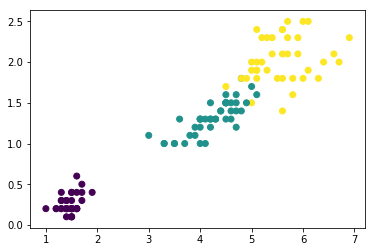

In [110]:
plt.scatter(x_train[:,0],x_train[:,1], c = y_train)

In [111]:
from sklearn.svm import SVC

In [112]:
clf = SVC()

In [113]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [114]:
y_predict = clf.predict(x_test)

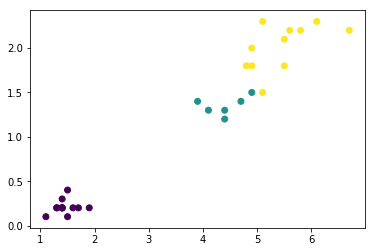

In [117]:
plt.scatter(x_test[:,0],x_test[:,1], c = y_predict) #預測值的視覺化

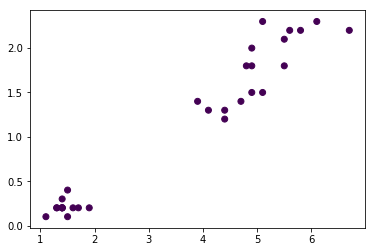

In [119]:
plt.scatter(x_test[:,0],x_test[:,1], c = y_predict - y_test) 
#預測值-實際值=0,代表完全命中則點不會出現.而出現的點為為命中的點

## 更炫的畫圖法

In [122]:
np.arange(0.3,10,0.5) #arrange可以非整數取間隔,0.3~10中取間隔0.5

array([0.3, 0.8, 1.3, 1.8, 2.3, 2.8, 3.3, 3.8, 4.3, 4.8, 5.3, 5.8, 6.3,
       6.8, 7.3, 7.8, 8.3, 8.8, 9.3, 9.8])

In [123]:
x1,x2 =np.meshgrid(np.arange(0,7,0.02),np.arange(0,3,0.02))

In [124]:
xx = [1,2,3,4]
yy = [5,6,7,8]

In [127]:
#list(zip(xx,yy))  先前使用zip
np.c_[xx,yy] #這次使用np中的c_ ,效果相同

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [130]:
Z = clf.predict(np.c_[x1.ravel(),x2.ravel()]) #x1 = X-axis, x2 = Y-axis

In [139]:
Z.shape

(150, 350)

In [138]:
x1.shape

(150, 350)

In [136]:
Z =Z.reshape(x1.shape) #Z的格式需要和x1相同

In [137]:
Z

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

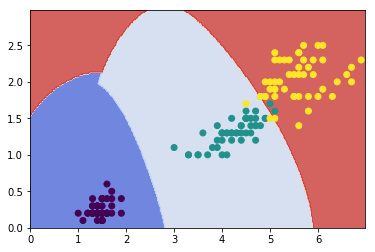

In [153]:
plt.contourf(x1, x2, Z ,cmap= plt.cm.coolwarm, alpha =0.8 ) #預測值
#alpha =不透明度
#cmap =顏色
plt.scatter(X[:,0],X[:,1],c=Y)#真實值
#其中部分黃點跑到淺藍區為分錯的區域